# KNN Project to classify patient as diabetic or not

This project uses the KNN Machine Learning model to correctly classify patients.

## 1. Importing the necessary libraries and the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("Diabetes.csv",index_col=0)
df.head()

C:\Users\Shahbaz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


## 2. Exploratory Data Analysis and Data Cleaning

In [2]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
null_values = df.isna().sum() # Checking for null values
print(null_values)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
duplicate_rows = df[df.duplicated()] # Checking for duplicates
print(duplicate_rows)


Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [6]:
l=list(df.columns)
l[0:len(l) - 1]

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

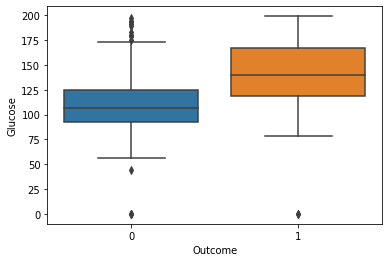

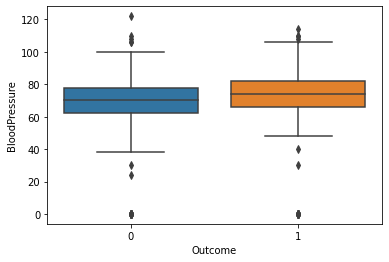

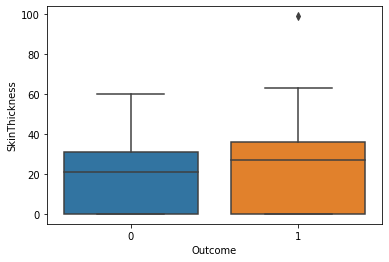

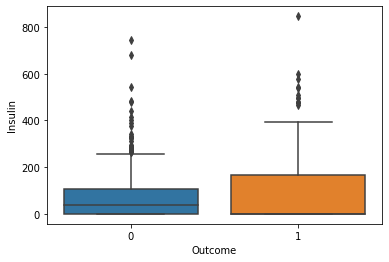

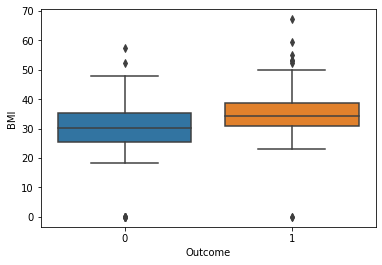

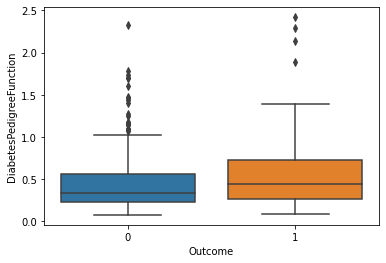

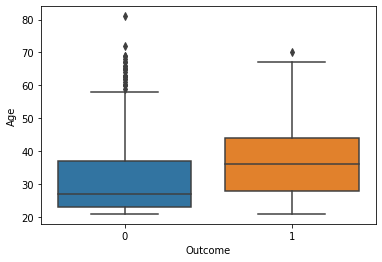

<Figure size 432x288 with 0 Axes>

In [10]:
for i in range(len(l)-1):
    sns.boxplot(x='Outcome',y=l[i], data=df)
    plt.figure()

## 3. Processing the Data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Important for the Eucildean distance calculation in KNN

In [12]:
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## 4. Importing the model and training it

In [15]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Outcome'], test_size=0.50, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[192  63]
 [ 60  69]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       255
           1       0.52      0.53      0.53       129

    accuracy                           0.68       384
   macro avg       0.64      0.64      0.64       384
weighted avg       0.68      0.68      0.68       384



In [20]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.32


## 5. Improving model accuracy by choosing k by the elbow method

In [36]:
error_rate = []

for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

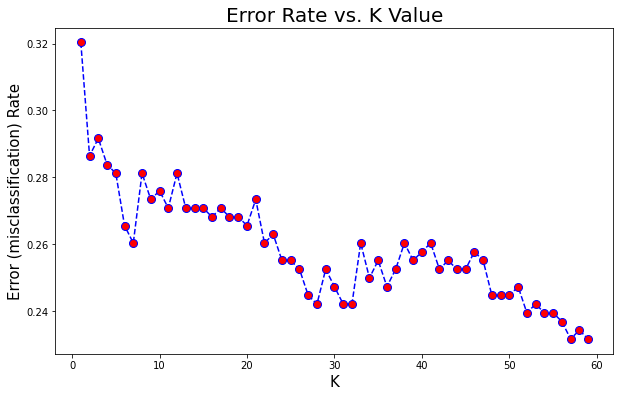

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [25]:
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=60)

In [26]:
pred = knn.predict(X_test)

In [27]:
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[235  20]
 [ 70  59]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       255
           1       0.75      0.46      0.57       129

    accuracy                           0.77       384
   macro avg       0.76      0.69      0.70       384
weighted avg       0.76      0.77      0.75       384



In [39]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.234


In [62]:
row_index = 2  # Replace with the index of the desired row
patient_data = df.iloc[row_index, :-1].values 
print(patient_data)

[183.     64.      0.      0.     23.3     0.672  32.   ]


In [63]:
patient_data = patient_data.reshape(1, -1)
scaled_patient_data = scaler.transform(patient_data)

C:\Users\Shahbaz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
pred_pat = knn.predict(scaled_patient_data)
if pred_pat[0] == 1:
    print("The patient is predicted to be diabetic.")
else:
    print("The patient is predicted not to be diabetic.")

The patient is predicted to be diabetic.
